The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
sys.path += ['../../../easyXRD']

In [3]:
import easyxrd



Checking required packages:

---ipympl package with version 0.9.4 is available and imported 
---pymatgen package with version 2024.5.1 is available and imported 
---pyFAI package with version 2024.5.0 is available and imported 
---scipy package with version 1.13.0 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---xarray package with version 2024.3.0 is available and imported 
---fabio package with version 2024.4.0 is available and imported 
---mp_api package with version 0.41.2 is available and imported 
---pandas package with version 2.2.2 is available and imported 


Imported pysuli with following configuration:



In [4]:
from easyxrd.core import exrd

In [5]:
import xarray as xr

In [6]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [7]:
# we use pyFAI for integrations: https://pyfai.readthedocs.io/en/v2023.1/
# It there exists a poni file and mask, we can load them like this:
import pyFAI,fabio

ai_file = 'tiff_files/_calibration.poni'
mask_file = 'tiff_files/_mask.edf'

ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data

In [15]:
%%time

sample_Blank = exrd()
# with xr.open_dataset('nc_files/Blank.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Blank.tiff',img)
# sample_Blank.load_xrd_data(from_tiff_file='tiff_files/Blank.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Blank.export_ds(save_dir='nc_files',save_name='Blank.nc')
sample_Blank.load_xrd_data(from_nc_file='nc_files/Blank.nc',
                            plot=False
                            )


sample_LaB6 = exrd()
# # with xr.open_dataset('nc_files/LaB6.nc') as ds:
# #     img = (ds.dexela_imgs.mean(dim='mBaseX').astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/LaB6.tiff',img)
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file='nc_files/LaB6.nc',
                            plot=False
                            )

sample_Pt = exrd()
# # with xr.open_dataset('nc_files/Pt.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/Pt.tiff',img)
# sample_Pt.load_xrd_data(from_tiff_file='tiff_files/Pt.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Pt.export_ds(save_dir='nc_files',save_name='Pt.nc')
sample_Pt.load_xrd_data(from_nc_file='nc_files/Pt.nc',
                            plot=False
                            )

sample_DAHL = exrd()
# # with xr.open_dataset('nc_files/DAHL.nc') as ds:
# #     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
# #     tifffile.imwrite('tiff_files/DAHL.tiff',img)
# sample_DAHL.load_xrd_data(from_tiff_file='tiff_files/DAHL.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_DAHL.export_ds(save_dir='nc_files',save_name='DAHL.nc')
sample_DAHL.load_xrd_data(from_nc_file='nc_files/DAHL.nc',
                            plot=False
                            )

sample_Dogbone = exrd()
# with xr.open_dataset('nc_files/Dogbone.nc') as ds:
#     img = (ds.dexela_img.astype('float32') - ds.dexela_img_dark.astype('float32')).values
#     tifffile.imwrite('tiff_files/Dogbone.tiff',img)
# sample_Dogbone.load_xrd_data(from_tiff_file='tiff_files/Dogbone.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,4.2),
#                             plot=True
#                             )
# sample_Dogbone.export_ds(save_dir='nc_files',save_name='Dogbone.nc')
sample_Dogbone.load_xrd_data(from_nc_file='nc_files/Dogbone.nc',
                            plot=False
                            )

phases_LaB6 = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_Pt = [
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]


phases_Zr = [
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_PtZrZrH = [
        {"mp_id":'none', "cif":'_cifs/ZrH1.66_a=4.7839.cif', "label":"ZrH", "scale":0.993, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_ZrZrH = [
        {"mp_id":'none', "cif":'_cifs/ZrH1.66_a=4.7839.cif', "label":"ZrH", "scale":0.993, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_PtZr = [
        {"mp_id":'none', "cif":'_cifs/Zr_a=3.2320_c=5.147.cif', "label":"Zr", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/Pt_a=3.9231.cif', "label":"Pt", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

CPU times: user 23.5 ms, sys: 2.94 ms, total: 26.5 ms
Wall time: 25.5 ms


[(1595,)]
[(1280,), (1280,)]
GSAS-II binary directory: /home/mt/g2full/GSAS-II/GSASII-bin/linux_64_p3.11_n1.26
7 values read from config file /home/mt/g2full/GSAS-II/GSASII/config.py

Rwp from 1st refinement is = 4.032 
 
Background is refined. Rwp is now 3.704 (was 4.032)
Cell parameters of all phases are refined. Rwp is now 2.608 (was 3.704)
Size broadening of all phases are refined. Rwp is now 2.604 (was 2.608)
Instrument parameters ['U', 'V', 'W', 'Y', 'Zero'] are refined. Rwp is now 2.540 (was 2.604)
Background is refined. Rwp is now 2.532 (was 2.540)
Cell parameters of all phases are refined. Rwp is now 2.534 (was 2.532)
Size broadening of all phases are refined. Rwp is now 2.537 (was 2.534)


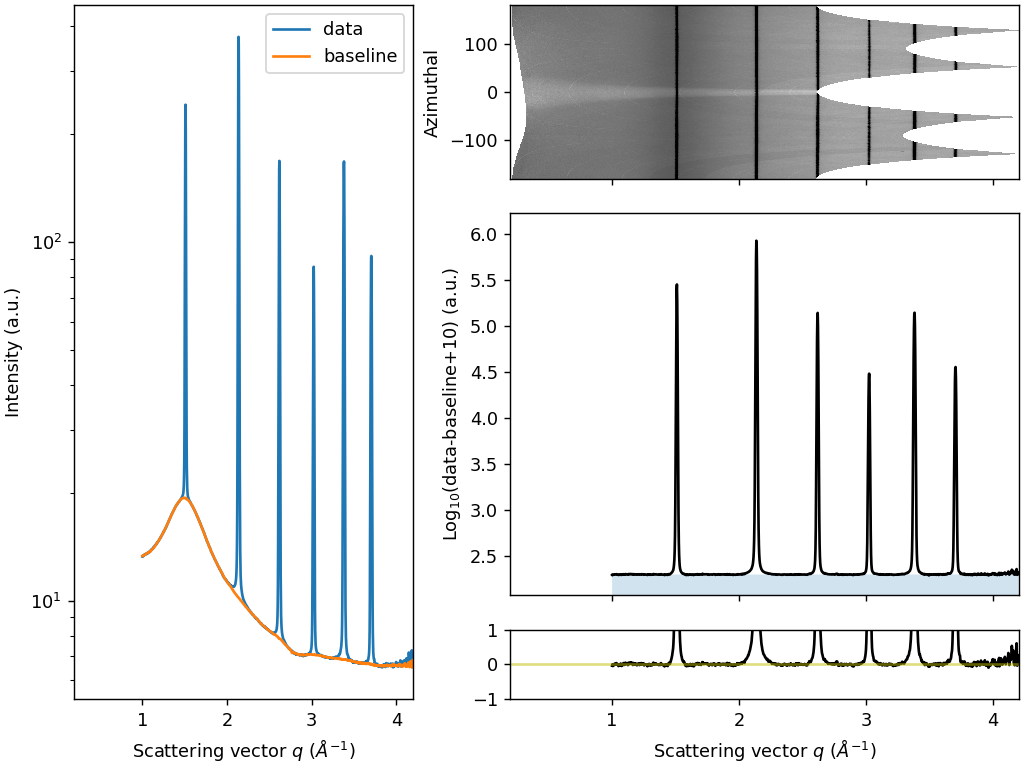

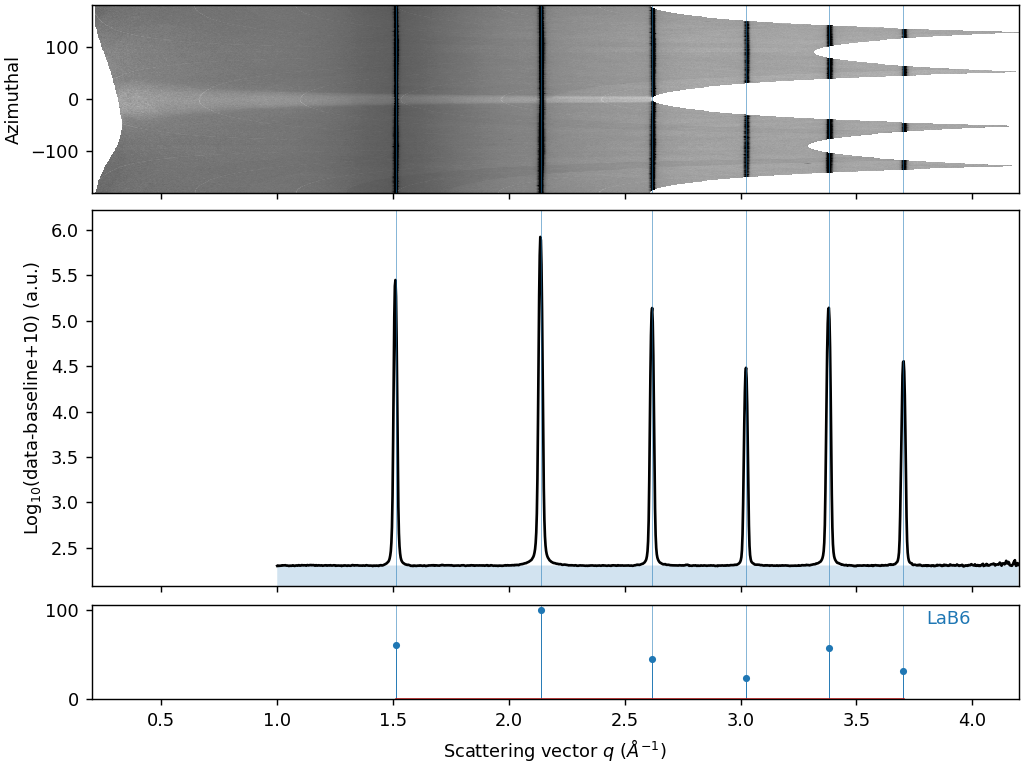

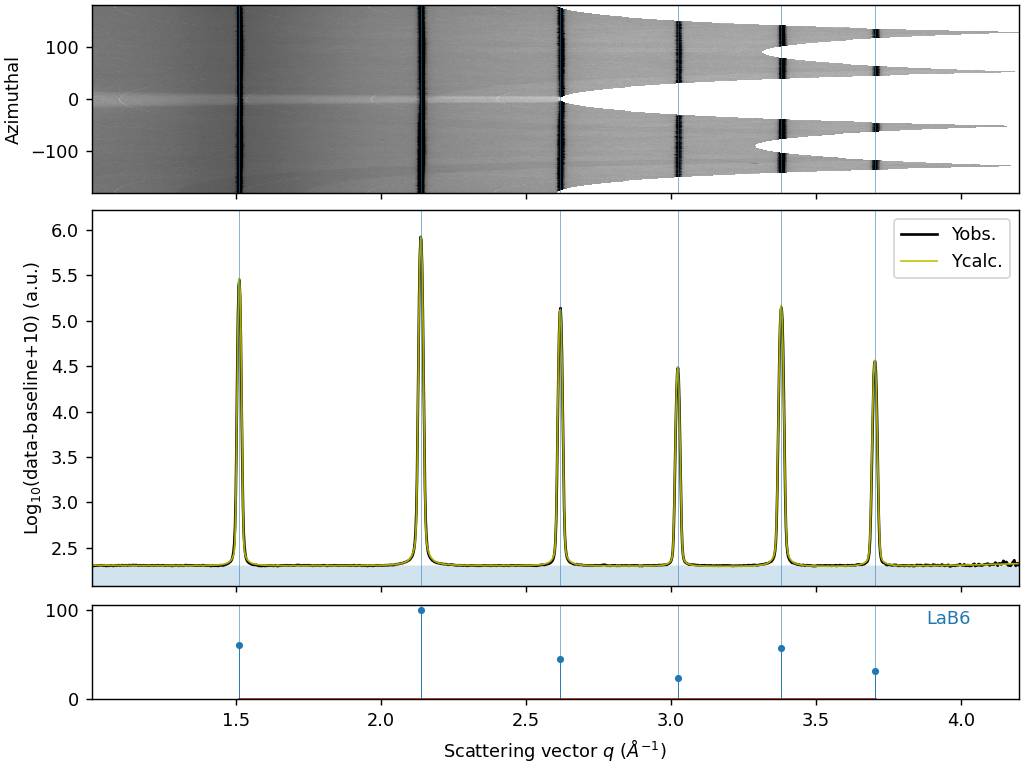

In [9]:
sample_LaB6.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.0,4.2],
                    # roi_azimuthal_range=[-14,14],
                    plot=True)

sample_LaB6.load_phases(phases=phases_LaB6,plot=True)


sample_LaB6.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample_LaB6.set_LeBail()

sample_LaB6.refine_background(num_coeffs=5)
sample_LaB6.refine_cell_params()
sample_LaB6.refine_size_broadening()




sample_LaB6.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W', 'Y', 'Zero'])
sample_LaB6.refine_background(num_coeffs=5)
sample_LaB6.refine_cell_params()
sample_LaB6.refine_size_broadening()

sample_LaB6.plot_refinement()

[(1595,)]
[(1080,), (1080,)]


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 32.302 
 
Background is refined. Rwp is now 26.778 (was 32.302)
Cell parameters of all phases are refined. Rwp is now 11.631 (was 26.778)
Size broadening of all phases are refined. Rwp is now 6.251 (was 11.631)
Instrument parameters ['U', 'V', 'W', 'Y', 'Zero'] are refined. Rwp is now 5.216 (was 6.251)
Background is refined. Rwp is now 4.565 (was 5.216)
Cell parameters of all phases are refined. Rwp is now 4.568 (was 4.565)
Size broadening of all phases are refined. Rwp is now 4.492 (was 4.568)


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


<xarray.Dataset> Size: 2MB
Dimensions:        (azimuthal_i2d: 360, radial_i2d: 1600, radial: 1080)
Coordinates:
  * azimuthal_i2d  (azimuthal_i2d) float32 1kB -179.5 -178.5 ... 178.5 179.5
  * radial_i2d     (radial_i2d) float32 6kB 0.2013 0.2037 0.2062 ... 4.196 4.199
  * radial         (radial) float32 4kB 1.501 1.504 1.506 ... 4.194 4.196 4.199
Data variables:
    i2d            (azimuthal_i2d, radial_i2d) float32 2MB nan nan ... nan nan
    i1d            (radial) float32 4kB 12.21 12.2 12.2 ... 4.887 5.001 5.08
    i1d_baseline   (radial) float32 4kB 12.09 12.09 12.08 ... 3.385 3.49 3.468
    i1d_refined    (radial) float32 4kB 10.4 10.39 10.39 ... 11.73 11.74 11.75

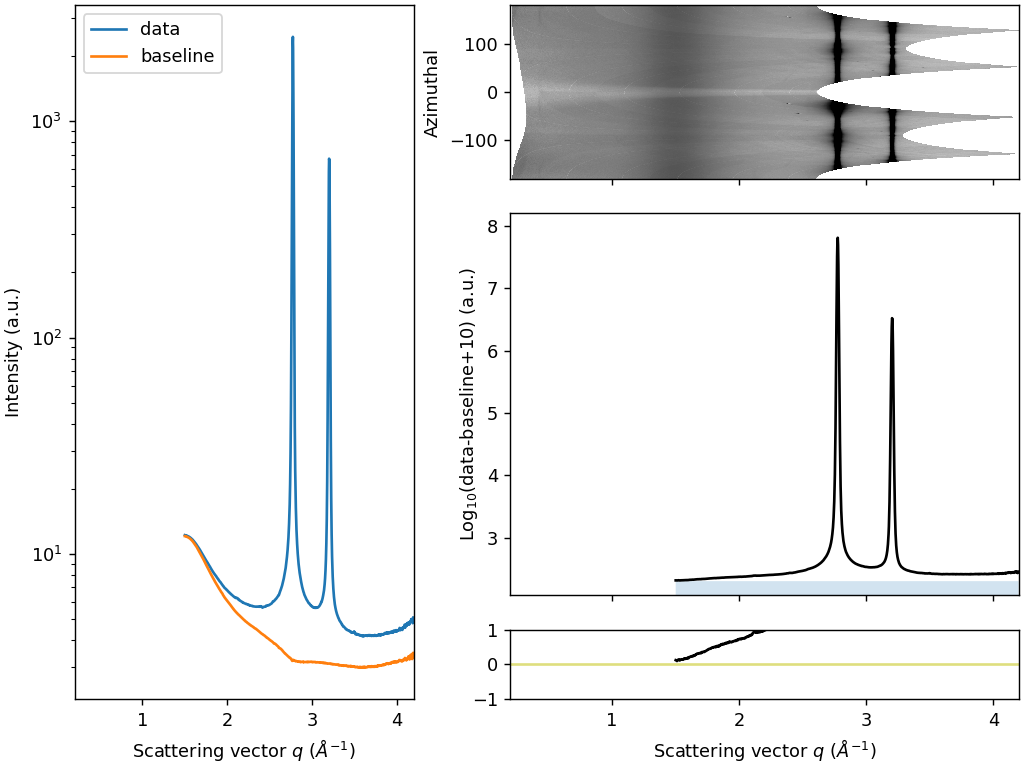

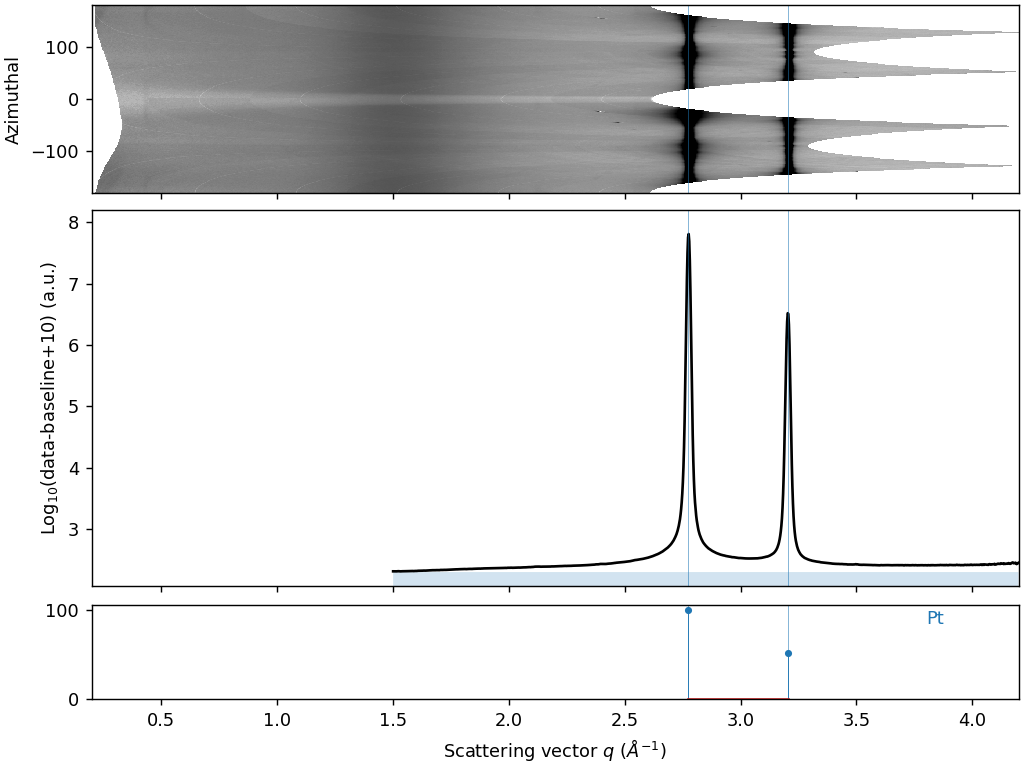

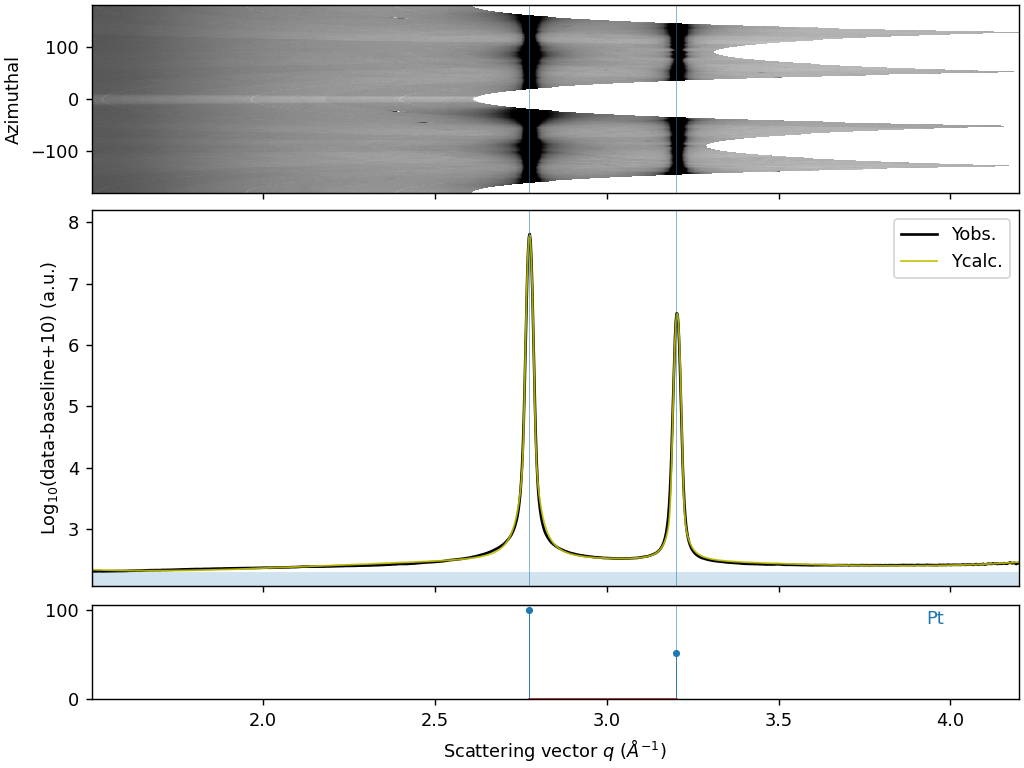

In [10]:
sample_Pt.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=False,
                    roi_radial_range=[1.5,4.2],
                    # roi_azimuthal_range=[-14,14],
                    plot=True)

sample_Pt.load_phases(phases=phases_Pt,plot=True)


sample_Pt.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample_Pt.set_LeBail()

sample_Pt.refine_background(num_coeffs=5)
sample_Pt.refine_cell_params()
sample_Pt.refine_size_broadening()
# sample_Dogbone.refine_strain_broadening()



sample_Pt.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W', 'Y', 'Zero'])
sample_Pt.refine_background(num_coeffs=5)
sample_Pt.refine_cell_params()
sample_Pt.refine_size_broadening()

sample_Pt.plot_refinement()

sample_Pt.ds

[(1595,)]
[(1080,), (1080,)]


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 64.935 
 
Background is refined. Rwp is now 37.073 (was 64.935)
Cell parameters of all phases are refined. Rwp is now 33.883 (was 37.073)
Size broadening of all phases are refined. Rwp is now 17.580 (was 33.883)
Instrument parameters ['U', 'V', 'W', 'Y', 'Zero'] are refined. Rwp is now 14.535 (was 17.580)
Background is refined. Rwp is now 11.847 (was 14.535)
Cell parameters of all phases are refined. Rwp is now 8.645 (was 11.847)
Size broadening of all phases are refined. Rwp is now 8.211 (was 8.645)


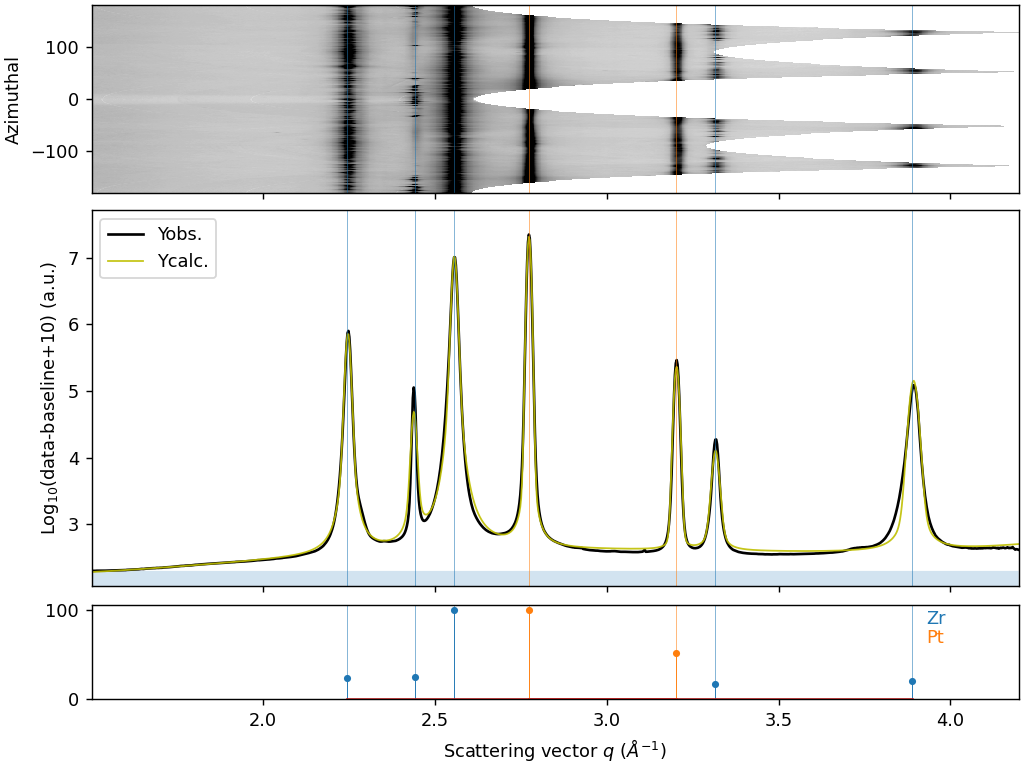

In [11]:
sample_DAHL.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=False,
                    roi_radial_range=[1.5,4.2],
                    # roi_azimuthal_range=[-14,14],
                    plot=False)

sample_DAHL.load_phases(phases=phases_PtZr,plot=False)


sample_DAHL.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample_DAHL.set_LeBail()

sample_DAHL.refine_background(num_coeffs=5)
sample_DAHL.refine_cell_params()
sample_DAHL.refine_size_broadening()
# sample_Dogbone.refine_strain_broadening()



sample_DAHL.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W', 'Y', 'Zero'])
sample_DAHL.refine_background(num_coeffs=5)
sample_DAHL.refine_cell_params()
sample_DAHL.refine_size_broadening()

sample_DAHL.plot_refinement()





[(1595,)]
[(1040,), (1040,)]


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))
/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))



Rwp from 1st refinement is = 83.184 
 
Background is refined. Rwp is now 24.442 (was 83.184)
Cell parameters of all phases are refined. Rwp is now 22.953 (was 24.442)
Size broadening of all phases are refined. Rwp is now 8.794 (was 22.953)
Instrument parameters ['U', 'V', 'W', 'Y', 'Zero'] are refined. Rwp is now 6.536 (was 8.794)
Background is refined. Rwp is now 5.507 (was 6.536)
Cell parameters of all phases are refined. Rwp is now 5.507 (was 5.507)
Size broadening of all phases are refined. Rwp is now 4.705 (was 5.507)


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


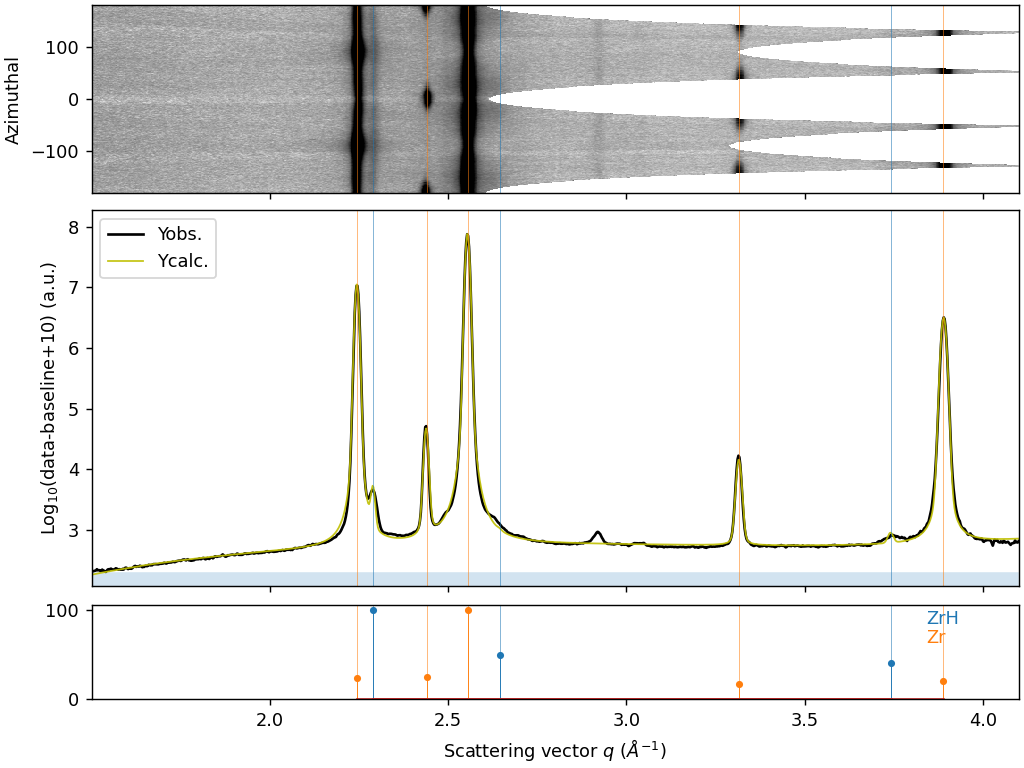

In [13]:

sample_Dogbone.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=False,
                    roi_radial_range=[1.5,4.1],
                    # roi_azimuthal_range=[-127,-37],
                    plot=False)

sample_Dogbone.load_phases(phases=phases_ZrZrH,plot=False)


sample_Dogbone.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample_Dogbone.set_LeBail()

sample_Dogbone.refine_background(num_coeffs=3)
sample_Dogbone.refine_cell_params()
sample_Dogbone.refine_size_broadening()
# sample_Dogbone.refine_strain_broadening()



sample_Dogbone.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W', 'Y', 'Zero'])
sample_Dogbone.refine_background(num_coeffs=5)
sample_Dogbone.refine_cell_params()
sample_Dogbone.refine_size_broadening()

sample_Dogbone.plot_refinement()


[(1595,)]
[(160,), (160,)]

Rwp from 1st refinement is = 30.176 
 


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/pymatgen/io/cif.py:1225: UserWarning: Issues encountered while parsing CIF: 2 fractional coordinates rounded to ideal values to avoid issues with finite precision.
Skipping relative stoichiometry check because CIF does not contain formula keys.
  warnings.warn("Issues encountered while parsing CIF: " + "\n".join(self.warnings))


Background is refined. Rwp is now 30.176 (was 30.176)
Size broadening of all phases are refined. Rwp is now 14.498 (was 30.176)
Instrument parameters ['U', 'V', 'W', 'Y'] are refined. Rwp is now 14.238 (was 14.498)
Background is refined. Rwp is now 12.396 (was 14.238)
Size broadening of all phases are refined. Rwp is now 12.176 (was 12.396)


/users/software/miniforge3/envs/menv/lib/python3.11/site-packages/xarray/core/computation.py:825: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


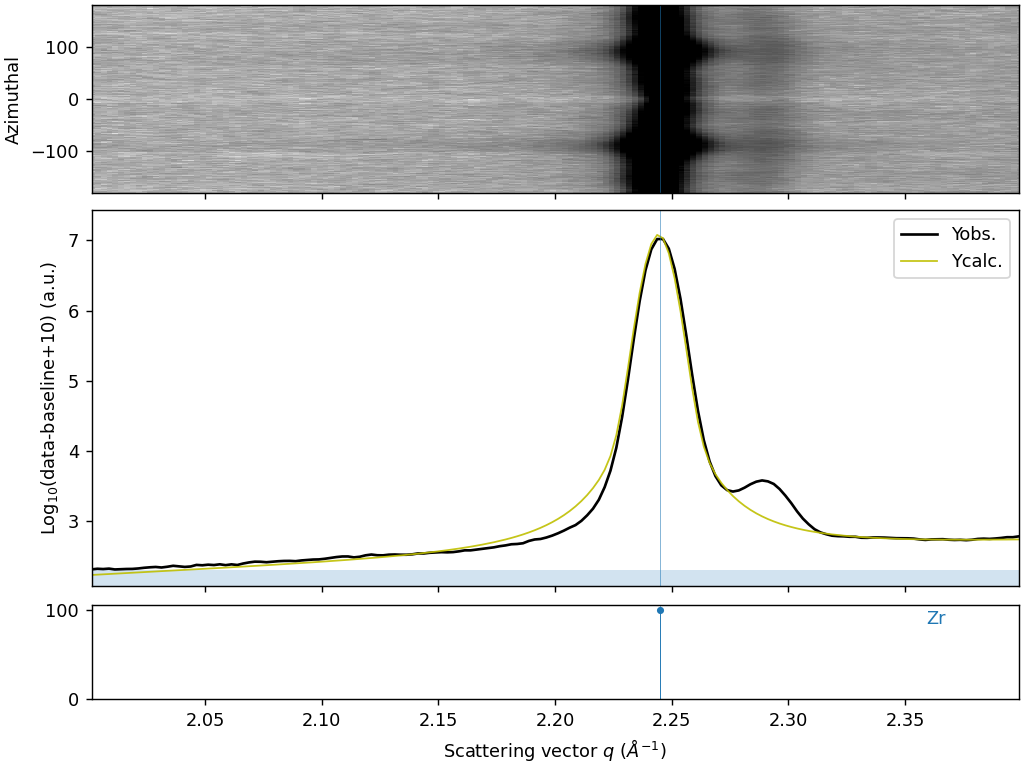

In [40]:

sample_Dogbone.get_baseline(i1d_bkg=sample_Blank.ds.i1d,
                    arpls_lam=1e4,
                    use_arpls=False,
                    roi_radial_range=[2.0,2.4],
                    # roi_azimuthal_range=[-120,-54],
                    # roi_azimuthal_range=[-15,15],
                    plot=False)

sample_Dogbone.load_phases(phases=phases_Zr,plot=False)


sample_Dogbone.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx')
sample_Dogbone.set_LeBail()

sample_Dogbone.refine_background(num_coeffs=1)
# sample_Dogbone.refine_cell_params()
sample_Dogbone.refine_size_broadening()
# sample_Dogbone.refine_strain_broadening()



sample_Dogbone.refine_inst_parameters(inst_pars_to_refine=['U', 'V', 'W', 'Y'])
sample_Dogbone.refine_background(num_coeffs=2)
# sample_Dogbone.refine_cell_params()
sample_Dogbone.refine_size_broadening()

sample_Dogbone.plot_refinement()
